<a href="https://colab.research.google.com/github/s-choung/Research_utility/blob/main/ase_basic_SChoung_Jan8th2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective: Basic ASE Usage for Structure Building and Visualization using POVRAY  
Date: Jan 8th 2025

Author: Seokhyun Choung

By the end of this tutorial, you should be comfortable

1) building systems of interest  

2) applying the examples provided in the following ASE tutorial: [ASE Tutorials](https://wiki.fysik.dtu.dk/ase/tutorials/tutorials.html)  



# Why ASE
https://wiki.fysik.dtu.dk/ase/

- **Automation**: Supports workflow automation for structure optimization, molecular dynamics (MD), and high-throughput simulations.  
- **Compatibility**: Works with many calculators (e.g., VASP, LAMMPS, Quantum ESPRESSO and MLPs) and integrates with Python libraries for data analysis.  
- **Modularity**: Allows custom workflows, atomic transformations, and supports various file formats (CIF, POSCAR, XYZ).  

You can also play with Pymatgen as same as ASE.



## Two Things in ASE You Should Know  

1. **Atoms Class**:  
   - Core class in ASE representing atomic systems .  
   ```
(positions, chemical symbols, charges, etc.)
```
   - Supports operations like structure building, manipulation, and setting up simulations.  
   

2. **Trajectory Class**:  
   - Used to store and read simulation trajectories (atomic positions over time).  
   - Allows easy saving, loading, and appending of MD or relaxation steps for post-analysis and visualization.  




## Get POVRAY

# Set calculator

## Get Mace for MLP calculation

- Github  https://github.com/ACEsuit/mace.
- Benchmark paper
https://arxiv.org/pdf/2401.00096

In [2]:
!pip install --upgrade pip
!pip install mace-torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 41.9 MB/s eta 0:00:00
  Created wheel for python-hostlist: filename=python_hostlist-2.2.1-py3-none-any.whl size=39603 sha256=868e145dbd1570f6d2362cb2e52adf381497ae687e2e97f9457971fdfe3c80ff
  Stored in directory: /root/.cache/pip/wheels/7a/a0/4e/057d4c6df390bb2f8c7c171df7bb39c124549a6b66cbe3480f
Successfully built python-hostlist


In [3]:
!sudo apt-get install povray  ## visulization program

import os
import gzip
import shutil
from PIL import Image
from IPython.display import display  # Import display for Jupyter Notebooks
from ase.io import write, read

def visual(structure, max_size=(200, 200), stretch_y=2.0, rotation='15z,-60x', png_save_path='./'):
    renderer = write('./temp.pov', structure, rotation=rotation)
    renderer.render()
    image_path = './temp.png'
    img = Image.open(image_path)
    display(img)
    files = ['./temp.ini', './temp.pov', './temp.png']
    destination = './output/'
    os.makedirs(destination, exist_ok=True)

    for file in files:
        if os.path.isfile(os.path.join(destination, os.path.basename(file))):
            os.remove(os.path.join(destination, os.path.basename(file)))
        if file == './temp.png':
            new_file_name = png_save_path + f'temp.png'
        else:
            new_file_name = os.path.basename(file)
        shutil.move(file, os.path.join(destination, new_file_name))


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
povray is already the newest version (1:3.7.0.10-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [4]:
import copy
from ase.optimize import LBFGS
from ase.build import bulk
from ase.constraints import ExpCellFilter

def energy_cal(atoms,calc,lattice_relax = False,fmax=0.05):
    atoms_copied = copy.deepcopy(atoms)
    atoms_copied.calc = calc
    if lattice_relax:
      ecf = ExpCellFilter(atoms_copied)
      optimizer = LBFGS(ecf)
    else:
      optimizer = LBFGS(atoms_copied)
    optimizer.run(fmax=fmax)

    return atoms_copied, atoms_copied.get_potential_energy()

## Example 1. Pt Bulk

In [6]:
import time
import numpy as np
from ase.build import bulk
from ase.constraints import FixAtoms
from mace.calculators import mace_mp

element='Pt'
mace_calc = mace_mp(model="medium", dispersion=False, default_dtype="float32",device= "cpu")

bulk_pt=bulk(element, 'fcc')
Relaxed_bulk_pt, E_bulk = energy_cal(bulk_pt,mace_calc,lattice_relax=True)
E_bulk_per_atom = E_bulk / len(Relaxed_bulk_pt)

print(f"Full relaxation result{E_bulk_per_atom = :.2f} eV")


Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


Default dtype float32 does not match model dtype float64, converting models to float32.


<ipython-input-4-db21cd9adafb>:10: FutureWarning: Import ExpCellFilter from ase.filters
  ecf = ExpCellFilter(atoms_copied)


       Step     Time          Energy          fmax
LBFGS:    0 03:52:59       -6.013740        1.007499
LBFGS:    1 03:53:00       -6.034801        0.002721
Full relaxation resultE_bulk_per_atom = -6.03 eV


In [7]:
def enlarge_and_visual(atoms,angle='15z,-70x',enlarge=(3,3,1)):
  temp=atoms.copy()
  temp=temp*enlarge
  temp.cell=atoms.cell
  visual(temp, rotation=angle)

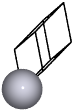

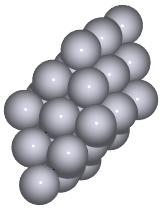

In [8]:
visual(bulk_pt)
enlarge_and_visual(bulk_pt,enlarge=(3,3,3))

## Example 2. Pt 111 slab

Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


       Step     Time          Energy          fmax
LBFGS:    0 03:53:12      -92.339981        0.378076
LBFGS:    1 03:53:13      -92.347778        0.343215
LBFGS:    2 03:53:13      -92.391129        0.264273
LBFGS:    3 03:53:13      -92.399216        0.295854
LBFGS:    4 03:53:14      -92.412346        0.285922
LBFGS:    5 03:53:14      -92.423729        0.214102
LBFGS:    6 03:53:15      -92.432541        0.097450
LBFGS:    7 03:53:15      -92.435188        0.019093
Time taken: 4.19 seconds


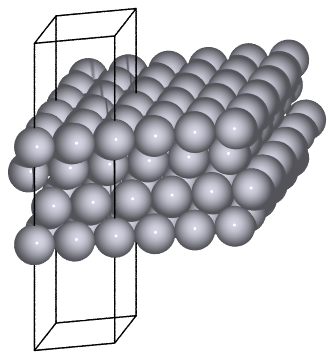

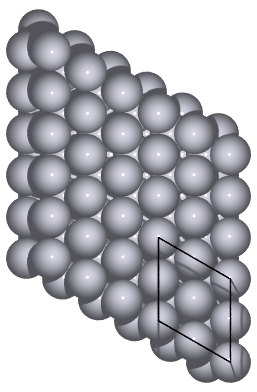

surface energy: 0.077 



In [9]:
from ase.build import fcc100, fcc110, fcc111

element='Pt'
calc =mace_mp(model="medium",  dispersion=False,  default_dtype="float32",  device= "cpu")

surf = fcc111(element, (2, 2, 4), vacuum=15/2)
surf.calc = calc

median_z = np.median(surf.positions[:, 2])
constraint = FixAtoms(mask=[atom.position[2] < (median_z + 0.01) for atom in surf])
surf.set_constraint(constraint)

start_time = time.time()
Relaxed_surf, E_slab = energy_cal(surf,calc)
elapsed_time = time.time() - start_time

print(f'Time taken: {elapsed_time:.2f} seconds')

enlarge_and_visual(Relaxed_surf)
enlarge_and_visual(Relaxed_surf,angle='90z,-0x',enlarge=(3,3,1)) # topview

a1 = Relaxed_surf.get_cell()[0]  # First lattice vector (in the surface plane)
a2 = Relaxed_surf.get_cell()[1]  # Second lattice vector (in the surface plane)
A = np.linalg.norm(np.cross(a1, a2))
n_atoms = len(surf)  # number of atoms in the slab
surface_energy = (E_slab- n_atoms*E_bulk)/(2*A)
print(f'surface energy:',round(surface_energy,3),'\n')

## Example 3. CO adsorption on Pt 111 slab

       Step     Time          Energy          fmax
LBFGS:    0 03:54:08      -92.339981        0.378076
LBFGS:    1 03:54:08      -92.347778        0.343215
LBFGS:    2 03:54:09      -92.391129        0.264273
LBFGS:    3 03:54:09      -92.399216        0.295854
LBFGS:    4 03:54:10      -92.412346        0.285922
LBFGS:    5 03:54:10      -92.423729        0.214102
LBFGS:    6 03:54:11      -92.432541        0.097450
LBFGS:    7 03:54:11      -92.435188        0.019093
Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


       Step     Time          Energy          fmax
LBFGS:    0 03:54:12      -14.219156        5.723266
LBFGS:    1 03:54:12      -13.746758        8.512238
LBFGS:    2 03:54:12      -14.308876        2.203780
LBFGS:    3 03:54:12      -14.326823        1.256661
LBFGS:    4 03:54:12      -14.333645        0.113176
LBFGS:    5 03:54:12      -14.333709        0.009646
       Step     Time          Energy          fmax
LBFGS:    0 03:54:13     -107.970131        8.849061
LBFGS:    1 03:54:14     -107.164093       14.035392
LBFGS:    2 03:54:14     -108.203568        4.161992
LBFGS:    3 03:54:14     -108.262169        3.227201
LBFGS:    4 03:54:15     -108.304779        0.535131
LBFGS:    5 03:54:15     -108.325493        0.690592
LBFGS:    6 03:54:16     -108.379730        0.883776
LBFGS:    7 03:54:16     -108.401955        0.552618
LBFGS:    8 03:54:17     -108.434799        0.511187
LBFGS:    9 03:54:17     -108.468842        0.679886
LBFGS:   10 03:54:18     -108.504791        0.7935

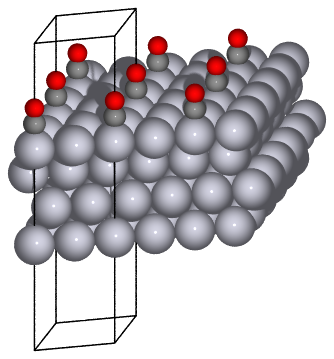

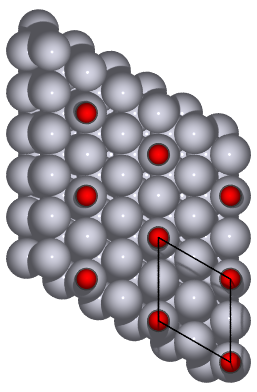

After relaxation


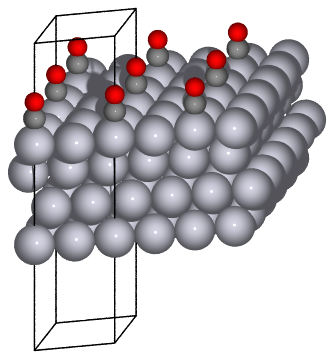

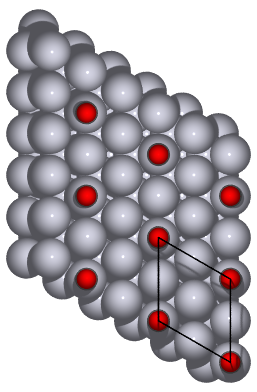

In [11]:
from fractions import Fraction
from ase.build import add_adsorbate
from ase import Atoms


surf = fcc111('Pt', (2, 2, 4), vacuum=15/2)

median_z = np.median(surf.positions[:, 2])
constraint = FixAtoms(mask=[atom.position[2] < (median_z + 0.01) for atom in surf])
surf.set_constraint(constraint)
Relaxed_surf, E_slab=energy_cal(surf,calc)


calc = mace_mp(model="medium",  dispersion=False,  default_dtype="float32",  device= "cpu")

CO = Atoms('CO',
            positions=[(0, 0, 0),
                        (0, 0, 1.1)],
            cell=(10, 10, 10),pbc='TRUE')

CO.calc = calc
Relaxed_CO, E_CO = energy_cal(CO,calc)

start_time = time.time()  # Start timing
adslab = surf.copy()
add_adsorbate(adslab, CO, 1.8, 'ontop')


adslab.calc = calc
Relaxed_adslab, E_adslab =  energy_cal(adslab,calc)
E_ads = E_adslab- E_CO - E_slab

elapsed_time = time.time() - start_time
print(f'Adsorption energy: {round(E_ads, 2)} eV')
print(f'Time taken: {elapsed_time:.2f} seconds\n')
print('Before relaxation')
enlarge_and_visual(adslab)
enlarge_and_visual(adslab,angle='90z,-0x') # topview

print('After relaxation')
enlarge_and_visual(Relaxed_adslab)
enlarge_and_visual(Relaxed_adslab,angle='90z,-0x') # topview

## Example 5. Pt 111 slab molecules

Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:135: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


Default dtype float32 does not match model dtype float64, converting models to float32.
       Step     Time          Energy          fmax
LBFGS:    0 03:55:36       -5.362154        5.016444
LBFGS:    1 03:55:36       -6.004457        4.156917
LBFGS:    2 03:55:36       -5.486509       13.290548
LBFGS:    3 03:55:36       -6.344169        2.800022
LBFGS:    4 03:55:36       -6.466064        1.788303
LBFGS:    5 03:55:37       -6.501408        1.486340
LBFGS:    6 03:55:37       -6.522754        0.336958
LBFGS:    7 03:55:37       -6.524408        0.076807
LBFGS:    8 03:55:37       -6.524489        0.007135
Running simulation for Au
       Step     Time          Energy          fmax
LBFGS:    0 03:55:37      -12.281579        0.647999
LBFGS:    1 03:55:37      -12.287496        0.595350
LBFGS:    2 03:55:38      -12.321782        0.373318
LBFGS:    3 03:55:38      -12.328455        0.460156
LBFGS:    4 03:55:38      -12.337126        0.504650
LBFGS:    5 03:55:38      -12.346807      

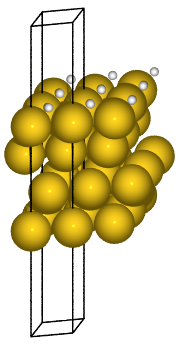

Adsorption energy for Au: 0.1903 eV

Running simulation for Pt
       Step     Time          Energy          fmax
LBFGS:    0 03:55:43      -23.084995        0.378075
LBFGS:    1 03:55:43      -23.086946        0.343214
LBFGS:    2 03:55:43      -23.097784        0.264255
LBFGS:    3 03:55:43      -23.099806        0.295848
LBFGS:    4 03:55:44      -23.103088        0.285926
LBFGS:    5 03:55:44      -23.105934        0.214111
LBFGS:    6 03:55:44      -23.108139        0.097468
LBFGS:    7 03:55:44      -23.108799        0.019103
       Step     Time          Energy          fmax
LBFGS:    0 03:55:44      -26.527103        1.822581
LBFGS:    1 03:55:45      -26.593714        1.499836
LBFGS:    2 03:55:45      -26.749081        0.509026
LBFGS:    3 03:55:45      -26.753214        0.429328
LBFGS:    4 03:55:45      -26.758909        0.270463
LBFGS:    5 03:55:45      -26.764040        0.115265
LBFGS:    6 03:55:46      -26.764977        0.051276
LBFGS:    7 03:55:46      -26.765051    

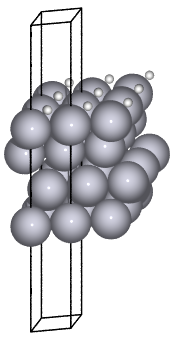

Adsorption energy for Pt: -0.3940 eV

Running simulation for Pd
       Step     Time          Energy          fmax
LBFGS:    0 03:55:48      -19.631628        0.360835
LBFGS:    1 03:55:48      -19.633533        0.336924
LBFGS:    2 03:55:49      -19.653107        0.282984
LBFGS:    3 03:55:49      -19.655066        0.276632
LBFGS:    4 03:55:49      -19.657764        0.213972
LBFGS:    5 03:55:49      -19.659748        0.114343
LBFGS:    6 03:55:50      -19.660646        0.029085
       Step     Time          Energy          fmax
LBFGS:    0 03:55:50      -23.361414        1.598413
LBFGS:    1 03:55:51      -23.412308        1.344504
LBFGS:    2 03:55:51      -23.594152        0.582535
LBFGS:    3 03:55:51      -23.608770        0.595859
LBFGS:    4 03:55:52      -23.615149        0.519390
LBFGS:    5 03:55:52      -23.635494        0.033399


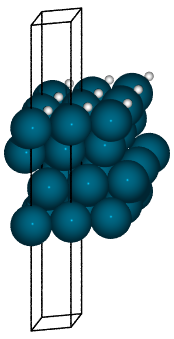

Adsorption energy for Pd: -0.7126 eV

Running simulation for Ag
       Step     Time          Energy          fmax
LBFGS:    0 03:55:54      -10.674779        0.245235
LBFGS:    1 03:55:54      -10.675674        0.237100
LBFGS:    2 03:55:54      -10.694231        0.168998
LBFGS:    3 03:55:54      -10.695662        0.171496
LBFGS:    4 03:55:54      -10.696487        0.158308
LBFGS:    5 03:55:55      -10.697489        0.125512
LBFGS:    6 03:55:55      -10.698718        0.065343
LBFGS:    7 03:55:55      -10.699378        0.019541
       Step     Time          Energy          fmax
LBFGS:    0 03:55:55      -13.496243        1.126039
LBFGS:    1 03:55:55      -13.522407        1.046080
LBFGS:    2 03:55:56      -13.700596        0.302502
LBFGS:    3 03:55:56      -13.703282        0.301326
LBFGS:    4 03:55:56      -13.705106        0.273215
LBFGS:    5 03:55:56      -13.712452        0.074783
LBFGS:    6 03:55:56      -13.713322        0.034890


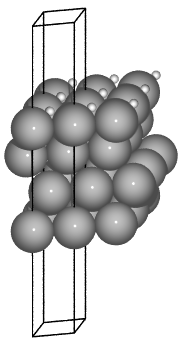

Adsorption energy for Ag: 0.2483 eV

Running simulation for Ir
       Step     Time          Energy          fmax
LBFGS:    0 03:55:58      -33.707909        0.467452
LBFGS:    1 03:55:58      -33.710758        0.362798
LBFGS:    2 03:55:58      -33.715000        0.195724
LBFGS:    3 03:55:58      -33.715546        0.189510
LBFGS:    4 03:55:59      -33.719608        0.018380
       Step     Time          Energy          fmax
LBFGS:    0 03:55:59      -37.674778        0.640313
LBFGS:    1 03:55:59      -37.681755        0.553384
LBFGS:    2 03:55:59      -37.706505        0.210038
LBFGS:    3 03:56:00      -37.707233        0.162857
LBFGS:    4 03:56:00      -37.708004        0.060711
LBFGS:    5 03:56:00      -37.708118        0.066897
LBFGS:    6 03:56:00      -37.708309        0.068030
LBFGS:    7 03:56:00      -37.708618        0.073767
LBFGS:    8 03:56:01      -37.709114        0.084173
LBFGS:    9 03:56:01      -37.709518        0.058269
LBFGS:   10 03:56:01      -37.709675    

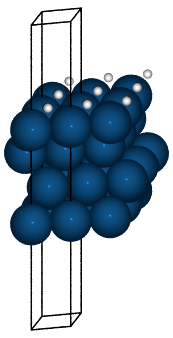

Adsorption energy for Ir: -0.7278 eV

Running simulation for Rh
       Step     Time          Energy          fmax
LBFGS:    0 03:56:03      -28.238945        0.560894
LBFGS:    1 03:56:03      -28.243727        0.428243
LBFGS:    2 03:56:03      -28.249647        0.099874
LBFGS:    3 03:56:03      -28.249784        0.084914
LBFGS:    4 03:56:04      -28.250626        0.080451
LBFGS:    5 03:56:04      -28.251087        0.064833
LBFGS:    6 03:56:04      -28.251272        0.022478
       Step     Time          Energy          fmax
LBFGS:    0 03:56:05      -31.962198        0.575892
LBFGS:    1 03:56:05      -31.973078        0.487742
LBFGS:    2 03:56:05      -32.019844        0.236010
LBFGS:    3 03:56:06      -32.023651        0.150233
LBFGS:    4 03:56:06      -32.024258        0.109220
LBFGS:    5 03:56:06      -32.024811        0.053325
LBFGS:    6 03:56:06      -32.024918        0.013123


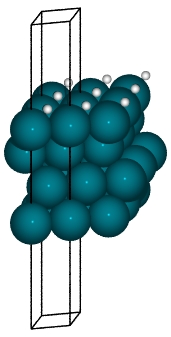

Adsorption energy for Rh: -0.5114 eV

Running simulation for Ni
       Step     Time          Energy          fmax
LBFGS:    0 03:56:08      -21.682352        0.303454
LBFGS:    1 03:56:08      -21.684130        0.247328
LBFGS:    2 03:56:08      -21.687691        0.025251
       Step     Time          Energy          fmax
LBFGS:    0 03:56:09      -25.091305        1.890300
LBFGS:    1 03:56:09      -25.173265        1.461473
LBFGS:    2 03:56:09      -25.348837        0.492937
LBFGS:    3 03:56:09      -25.365173        0.429250
LBFGS:    4 03:56:09      -25.375631        0.372948
LBFGS:    5 03:56:10      -25.381611        0.349038
LBFGS:    6 03:56:10      -25.392271        0.324931
LBFGS:    7 03:56:10      -25.397453        0.172194
LBFGS:    8 03:56:10      -25.398659        0.149145
LBFGS:    9 03:56:10      -25.399746        0.143022
LBFGS:   10 03:56:11      -25.401892        0.171200
LBFGS:   11 03:56:11      -25.406090        0.200042
LBFGS:   12 03:56:11      -25.411428   

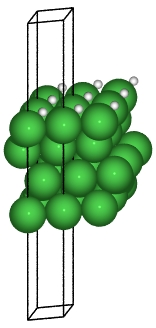

Adsorption energy for Ni: -0.4664 eV



In [12]:
import numpy as np

# Define parameters
elements = ['Au', 'Pt', 'Pd','Ag','Ir','Rh','Ni']


E_H_dict= {'MACE' : []}

calc =mace_mp(model="medium",  dispersion=False,  default_dtype="float32",  device= "cpu")
E_H_list = []


gas = Atoms('H2',
            positions=[(0, 0, 0), (0, 0, 1.1)],
            cell=(10, 10, 10),
            pbc=True)

gas.calc = calc
start_time = time.time()
Relaxed_gas, E_gas = energy_cal(gas,calc)

for element in elements:
    print(f"Running simulation for {element}")

    surf = fcc111(element, (1, 1, 4), vacuum=15/2) # lattice constant will be taken from default tabulated values from ase
    median_z = np.median(surf.positions[:, 2])
    constraint = FixAtoms(mask=[atom.position[2] < (median_z + 0.01) for atom in surf])
    surf.set_constraint(constraint)

    surf.calc = calc
    start_time = time.time()
    Relaxed_slab, E_slab = energy_cal(surf,calc)
    elapsed_time = time.time() - start_time

    # Set up the adsorbate on the slab
    adsorbate_atom = Atoms('H')
    adslab = surf.copy()
    add_adsorbate(adslab, adsorbate_atom, 1.2, 'fcc')
    adslab.calc = calc
    start_time = time.time()
    Relaxed_adslab, E_adslab = energy_cal(adslab,calc)
    elapsed_time = time.time() - start_time
    enlarge_and_visual(Relaxed_adslab)
    E_ads = E_adslab - E_gas / 2 - E_slab
    print(f'Adsorption energy for {element}: {E_ads:.4f} eV\n')
    E_H_list.append(E_ads)

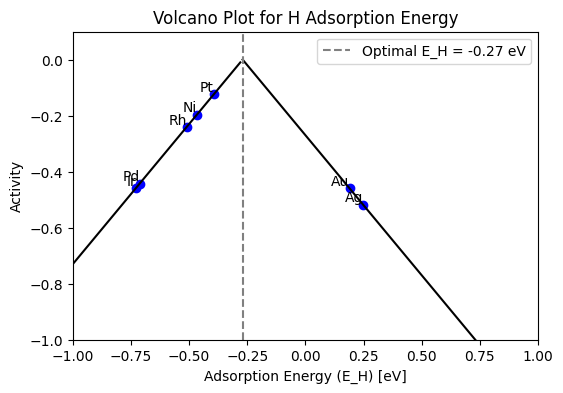

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define the optimal value for the volcano plot
optimal_E_H = -0.27

# Generate x-values for the two lines
x_left = np.arange(-2, optimal_E_H, 0.01)
y_left = x_left - optimal_E_H

x_right = np.arange(optimal_E_H, 2, 0.01)
y_right = optimal_E_H - x_right

# Plot the volcano lines
plt.figure(figsize=(6, 4))
plt.plot(x_left, y_left, linestyle='-', color='black')
plt.plot(x_right, y_right, linestyle='-', color='black')

# Scatter the adsorption energies
activity_list=[-abs( optimal_E_H - x) for x in E_H_list]
plt.scatter(E_H_list, activity_list, color='blue')

plt.axvline(x=optimal_E_H, color='gray', linestyle='--', label=f'Optimal E_H = {optimal_E_H} eV')
for i, element in enumerate(elements):
    plt.text(E_H_list[i], activity_list[i], element, fontsize=10, ha='right', va='bottom')

# Plot labels and title
plt.xlabel('Adsorption Energy (E_H) [eV]')
plt.ylabel('Activity')
plt.xlim(-1, 1)
plt.ylim(-1, 0.1)
plt.title('Volcano Plot for H Adsorption Energy')
plt.legend()

plt.show()

https://www.science.org/doi/10.1126/science.aad4998

# FAQ


How to save Atoms class and Trajectory class?


How to enlarge unitcell to supercell

How to delete one atom in a system

How to substitute one atom in a system?

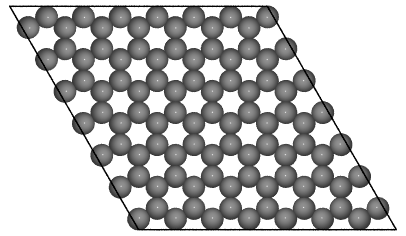

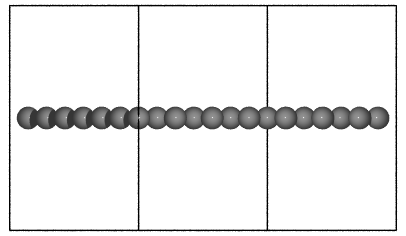

In [14]:
from ase.build import graphene, make_supercell
import numpy as np

# 기본 그래핀 구조 생성
graphene_sheet = graphene(a=2.46)

supercell_matrix = np.diag([7, 7, 1])
graphene_supercell = make_supercell(graphene_sheet, supercell_matrix)

graphene_supercell.cell[2, 2] += 15.0  # 진공 15 Å 추가
graphene_supercell.center()  # z축 중심에 맞추기

enlarge_and_visual(graphene_supercell,angle='0z,-0x',enlarge=(1,1,1))
enlarge_and_visual(graphene_supercell,angle='0z,-90x',enlarge=(1,1,1))

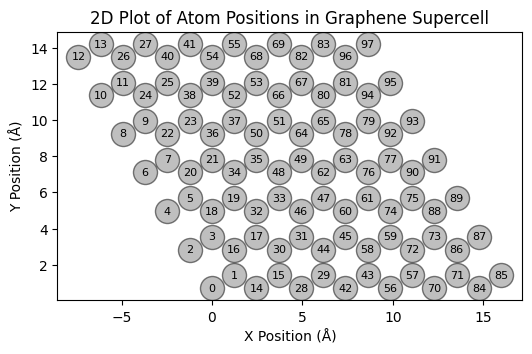

In [15]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))

# 각 원자의 인덱스 텍스트 표시
for i, atom in enumerate(graphene_supercell):
  x,y=atom.position[0],atom.position[1]
  idx=atom.index
  plt.scatter(x, y, s=300, color='gray', alpha=0.5,edgecolors='black', label='Atoms')
  plt.text(x,y, idx, fontsize=8, ha='center', va='center', color='black')

plt.xlabel('X Position (Å)')
plt.ylabel('Y Position (Å)')
plt.title('2D Plot of Atom Positions in Graphene Supercell')
plt.gca().set_aspect('equal', adjustable='box')  # x, y 비율을 동일하게 유지
plt.show()


target:

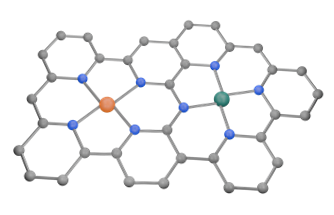

[0.615      7.45647873 7.5       ] [5.535      5.32605623 7.5       ]


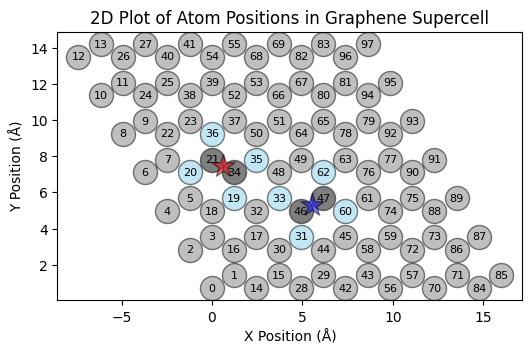

In [16]:
plt.figure(figsize=(6, 6))
index_to_substitute=[19,20,35,36,33,62,31,60]
index_to_delete=[21,34,46,47]
Fe_position = (graphene_supercell[21].position + graphene_supercell[34].position) / 2
Ni_position = (graphene_supercell[46].position + graphene_supercell[47].position) / 2
print(Fe_position,Ni_position)
# 각 원자의 인덱스 텍스트 표시
for atom in graphene_supercell:
  x,y=atom.position[0],atom.position[1]
  idx=atom.index
  if idx in index_to_substitute:
      color = 'skyblue'
  elif idx in index_to_delete:
      color = 'black'
  else:
      color='gray'
  plt.scatter(x, y, s=300, color=color, alpha=0.5,edgecolors='black', label='Atoms')
  plt.text(x,y, idx, fontsize=8, ha='center', va='center', color='black')

plt.scatter(Fe_position[0], Fe_position[1], s=300, marker='*',color='red', alpha=0.5,edgecolors='black', label='Atoms')
plt.scatter(Ni_position[0], Ni_position[1], s=300, marker='*',color='blue', alpha=0.5,edgecolors='black', label='Atoms')

plt.xlabel('X Position (Å)')
plt.ylabel('Y Position (Å)')
plt.title('2D Plot of Atom Positions in Graphene Supercell')
plt.gca().set_aspect('equal', adjustable='box')  # x, y 비율을 동일하게 유지
plt.show()


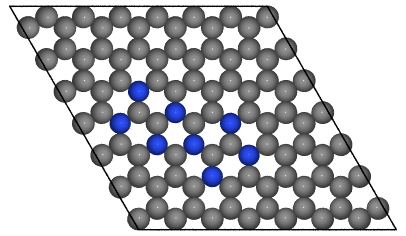

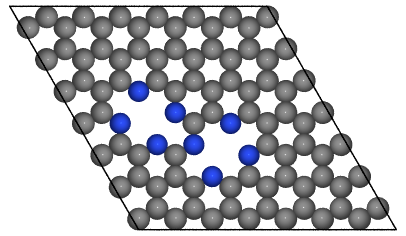

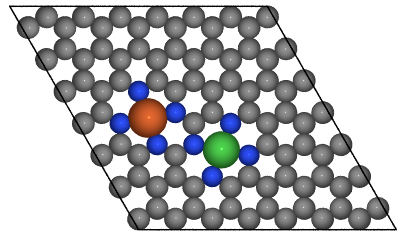

In [17]:
from ase import Atom

# N 치환
N_sub_G=graphene_supercell.copy()
for atom in N_sub_G:
  idx=atom.index
  if idx in index_to_substitute:
    atom.symbol='N'
enlarge_and_visual(N_sub_G,angle='0z,-0x',enlarge=(1,1,1))

# C 제거
C_del_NC = N_sub_G.copy()
mask = [atom.index not in index_to_delete for atom in C_del_NC]
C_del_NC = C_del_NC[mask]  # Keep only atoms not in `index_to_delete`
enlarge_and_visual(C_del_NC, angle='0z,-0x', enlarge=(1, 1, 1))


DAC_graphene=C_del_NC.copy()
# Ni 원자 추가
ni_atom = Atom('Ni', position=np.array(Ni_position))
DAC_graphene += ni_atom
# Fe 원자 추가
fe_atom = Atom('Fe', position=np.array(Fe_position))
DAC_graphene += fe_atom
enlarge_and_visual(DAC_graphene, angle='0z,-0x', enlarge=(1, 1, 1))


In [18]:
Relaxed_DAC, E_DAC=energy_cal(DAC_graphene,mace_calc,lattice_relax=True)

<ipython-input-4-db21cd9adafb>:10: FutureWarning: Import ExpCellFilter from ase.filters
  ecf = ExpCellFilter(atoms_copied)


       Step     Time          Energy          fmax
LBFGS:    0 03:56:37     -865.166260        2.586898
LBFGS:    1 03:56:39     -865.812500        1.593166
LBFGS:    2 03:56:41     -865.966003        0.850898
LBFGS:    3 03:56:43     -866.088135        0.865850
LBFGS:    4 03:56:47     -866.123657        0.656384
LBFGS:    5 03:56:50     -865.896362        1.410872
LBFGS:    6 03:56:52     -866.267456        0.433238
LBFGS:    7 03:56:54     -866.306580        0.222002
LBFGS:    8 03:56:57     -866.313354        0.236485
LBFGS:    9 03:57:00     -866.330811        0.258027
LBFGS:   10 03:57:03     -866.345337        0.223085
LBFGS:   11 03:57:06     -866.354858        0.128622
LBFGS:   12 03:57:08     -866.360596        0.097641
LBFGS:   13 03:57:10     -866.365356        0.089652
LBFGS:   14 03:57:12     -866.368347        0.075576
LBFGS:   15 03:57:16     -866.369507        0.034522


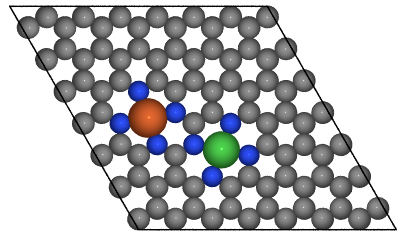

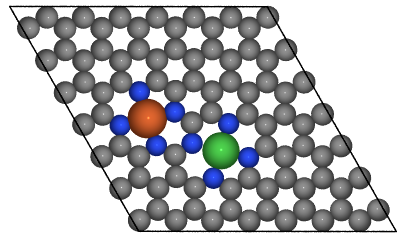

In [19]:
enlarge_and_visual(DAC_graphene, angle='0z,-0x', enlarge=(1, 1, 1))
enlarge_and_visual(Relaxed_DAC, angle='0z,-0x', enlarge=(1, 1, 1))

'''

    from ase.io import Trajectory
    atoms.set_calculator(calculator)
    traj = Trajectory("relaxation_DAC.traj", "w", atoms)
    optimizer = LBFGS(atoms, logfile="relaxation.log")
    optimizer.attach(traj.write, interval=1)  # Save structure at each step
    optimizer.run(fmax=0.05)  # Convergence criterion

'''

In [20]:
from ase.io import write
write('DAC_graphene.xyz', DAC_graphene)
write('Relaxed_DAC_graphene.xyz', Relaxed_DAC)
write('Relaxed_DAC_graphene.vasp', Relaxed_DAC)
write('Relaxed_DAC_graphene.cif', Relaxed_DAC)

atoms_list=[DAC_graphene,Relaxed_DAC]
write('atoms_list.traj', atoms_list)
trajectory=read('atoms_list.traj',':')

In [21]:
print(trajectory[0])
print(trajectory[1])

Atoms(symbols='C86FeN8Ni', pbc=[True, True, False], cell=[[17.22, 0.0, 0.0], [-8.61, 14.912957453168033, 0.0], [0.0, 0.0, 15.0]])
Atoms(symbols='C86FeN8Ni', pbc=[True, True, False], cell=[[17.17575699973416, -0.01904586368156613, 7.514528553092747e-07], [-8.604372701652345, 14.999810928335778, -6.609464285532444e-07], [6.545756579349085e-07, -2.8688474616215286e-07, 14.999999999998892]], calculator=SinglePointCalculator(...))


How to get new structures from external source?

In [22]:
# https://next-gen.materialsproject.org/materials/mp-601820?chemsys=Fe-Co
from ase.io import read
Fe3Co=read('Fe3Co.cif')
enlarge_and_visual(Fe3Co, angle='0z,-0x', enlarge=(1, 1, 1))

FileNotFoundError: [Errno 2] No such file or directory: 'Fe3Co.cif'

How to play with molecules?

['PH3', 'P2', 'CH3CHO', 'H2COH', 'CS', 'OCHCHO', 'C3H9C', 'CH3COF', 'CH3CH2OCH3', 'HCOOH', 'HCCl3', 'HOCl', 'H2', 'SH2', 'C2H2', 'C4H4NH', 'CH3SCH3', 'SiH2_s3B1d', 'CH3SH', 'CH3CO', 'CO', 'ClF3', 'SiH4', 'C2H6CHOH', 'CH2NHCH2', 'isobutene', 'HCO', 'bicyclobutane', 'LiF', 'Si', 'C2H6', 'CN', 'ClNO', 'S', 'SiF4', 'H3CNH2', 'methylenecyclopropane', 'CH3CH2OH', 'F', 'NaCl', 'CH3Cl', 'CH3SiH3', 'AlF3', 'C2H3', 'ClF', 'PF3', 'PH2', 'CH3CN', 'cyclobutene', 'CH3ONO', 'SiH3', 'C3H6_D3h', 'CO2', 'NO', 'trans-butane', 'H2CCHCl', 'LiH', 'NH2', 'CH', 'CH2OCH2', 'C6H6', 'CH3CONH2', 'cyclobutane', 'H2CCHCN', 'butadiene', 'C', 'H2CO', 'CH3COOH', 'HCF3', 'CH3S', 'CS2', 'SiH2_s1A1d', 'C4H4S', 'N2H4', 'OH', 'CH3OCH3', 'C5H5N', 'H2O', 'HCl', 'CH2_s1A1d', 'CH3CH2SH', 'CH3NO2', 'Cl', 'Be', 'BCl3', 'C4H4O', 'Al', 'CH3O', 'CH3OH', 'C3H7Cl', 'isobutane', 'Na', 'CCl4', 'CH3CH2O', 'H2CCHF', 'C3H7', 'CH3', 'O3', 'P', 'C2H4', 'NCCN', 'S2', 'AlCl3', 'SiCl4', 'SiO', 'C3H4_D2d', 'H', 'COF2', '2-butyne', 'C2H5', 'BF3'

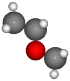

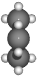

In [23]:
from ase.collections import g2
print(g2.names)
enlarge_and_visual(g2['CH3CH2OCH3'], angle='0z,-0x', enlarge=(1, 1, 1))
enlarge_and_visual(g2['isobutene'], angle='0z,-0x', enlarge=(1, 1, 1))

# Read More
[석현 깃헙 tutorials] https://github.com/s-choung/Simulation_tutorials

[ASE 공식 tutorials] https://wiki.fysik.dtu.dk/ase/

[Matlantis tutorials] https://docs.matlantis.com/atomistic-simulation-tutorial/en/
